In [24]:
import ibm_db
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [25]:
%sql ibm_db_sa://hfc14579:dzf946p%2B9cwlkwf5@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB

'Connected: hfc14579@BLUDB'

In [26]:
collisions = %sql select * from collisions
df = collisions.DataFrame()

 * ibm_db_sa://hfc14579:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


In [8]:
df.head()

,severity,x,y,location,intoxicated,weather,road,light
0,2,-122.3231484,47.70314032,Intersection,0,Overcast,Wet,Daylight
1,1,-122.3472943,47.64717249,Block,0,Raining,Wet,Dark
2,1,-122.3345400,47.60787143,Block,0,Overcast,Dry,Daylight
3,1,-122.3348033,47.60480289,Block,0,Clear,Dry,Daylight
4,2,-122.3064263,47.54573946,Intersection,0,Raining,Wet,Daylight


In [22]:
df.shape

(166705, 8)

In [27]:
import itertools
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [30]:
light_condition_distribution = %sql SELECT light as "Light Condition", count(*) as "Frequency" from COLLISIONS GROUP BY light;
light_condition_distribution

 * ibm_db_sa://hfc14579:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


Light Condition,Frequency
Dark,48133
Dawn,2347
Daylight,110520
Dusk,5545
Other,160


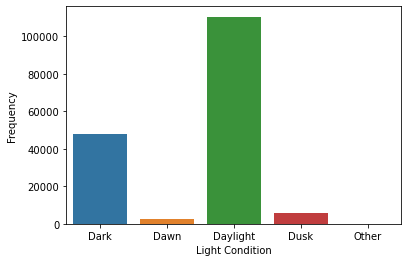

In [33]:
dataframe = light_condition_distribution.DataFrame()
plot = sbn.barplot(x='Light Condition',y='Frequency', data=dataframe)

In [8]:
severity_distribution = %sql SELECT severity as "Severity", count(*) as "Frequency" from COLLISIONS GROUP BY severity;
severity_distribution

 * ibm_db_sa://hfc14579:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


Severity,Frequency
1,111844
2,54861


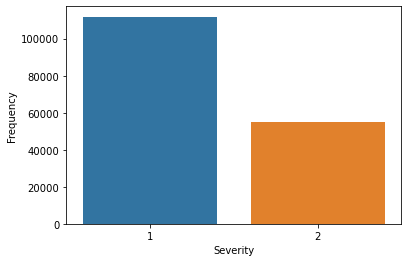

In [10]:
dataframe = severity_distribution.DataFrame()
plot = sbn.barplot(x='Severity',y='Frequency', data=dataframe)

In [11]:
location_distribution = %sql SELECT location as "Location", count(*) as "Frequency" from COLLISIONS GROUP BY location;
location_distribution

 * ibm_db_sa://hfc14579:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


Location,Frequency
Block,105600
Intersection,61105


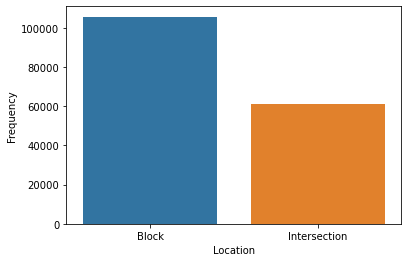

In [12]:
dataframe = location_distribution.DataFrame()
plot = sbn.barplot(x='Location',y='Frequency', data=dataframe)

In [18]:
weather_distribution = %sql SELECT weather as "Weather", count(*) as "Frequency" from COLLISIONS GROUP BY weather;
weather_distribution

 * ibm_db_sa://hfc14579:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


Weather,Frequency
Blowing Sand/Dirt,43
Clear,106875
Fog/Smog/Smoke,539
Other,242
Overcast,26429
Partly Cloudy,5
Raining,31619
Severe Crosswind,24
Sleet/Hail/Freezing Rain,110
Snowing,819


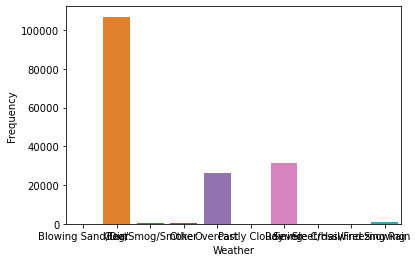

In [19]:
dataframe = weather_distribution.DataFrame()
plot = sbn.barplot(x='Weather',y='Frequency', data=dataframe)

In [20]:
road_condition_distribution = %sql SELECT road as "Road Condition", count(*) as "Frequency" from COLLISIONS GROUP BY road;
road_condition_distribution

 * ibm_db_sa://hfc14579:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


Road Condition,Frequency
Dry,119406
Ice,1071
Oil,50
Other,98
Sand/Mud/Dirt,57
Snow/Slush,833
Standing Water,95
Wet,45095


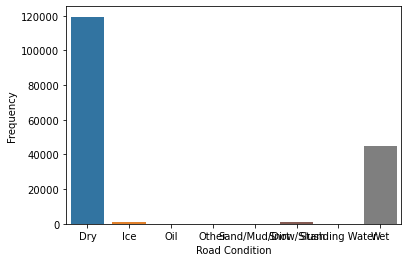

In [21]:
dataframe = road_condition_distribution.DataFrame()
plot = sbn.barplot(x='Road Condition',y='Frequency', data=dataframe)

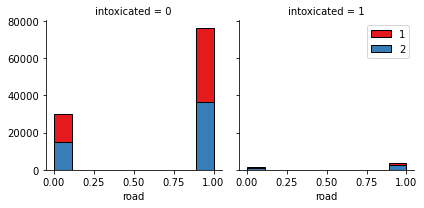

In [36]:
import seaborn as sns
bins = np.linspace(df.road.min(), df.road.max(), 10)
g = sns.FacetGrid(df, col="intoxicated", hue="severity", palette="Set1", col_wrap=2)
g.map(plt.hist, 'road', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

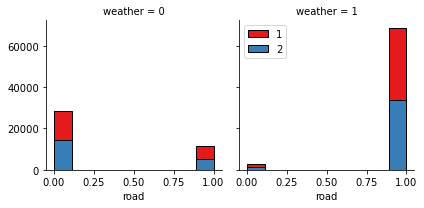

In [37]:
import seaborn as sns
bins = np.linspace(df.road.min(), df.road.max(), 10)
g = sns.FacetGrid(df, col="weather", hue="severity", palette="Set1", col_wrap=2)
g.map(plt.hist, 'road', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

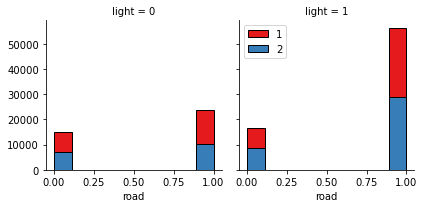

In [38]:
import seaborn as sns
bins = np.linspace(df.road.min(), df.road.max(), 10)
g = sns.FacetGrid(df, col="light", hue="severity", palette="Set1", col_wrap=2)
g.map(plt.hist, 'road', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

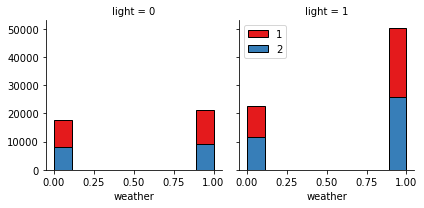

In [39]:
import seaborn as sns
bins = np.linspace(df.road.min(), df.road.max(), 10)
g = sns.FacetGrid(df, col="light", hue="severity", palette="Set1", col_wrap=2)
g.map(plt.hist, 'weather', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

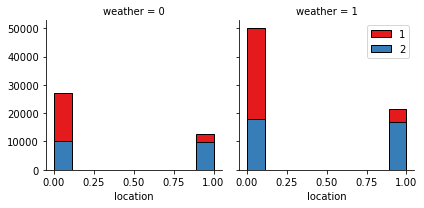

In [40]:
import seaborn as sns
bins = np.linspace(df.road.min(), df.road.max(), 10)
g = sns.FacetGrid(df, col="weather", hue="severity", palette="Set1", col_wrap=2)
g.map(plt.hist, 'location', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

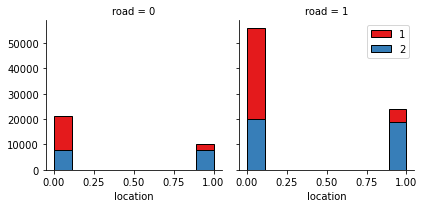

In [41]:
import seaborn as sns
bins = np.linspace(df.road.min(), df.road.max(), 10)
g = sns.FacetGrid(df, col="road", hue="severity", palette="Set1", col_wrap=2)
g.map(plt.hist, 'location', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

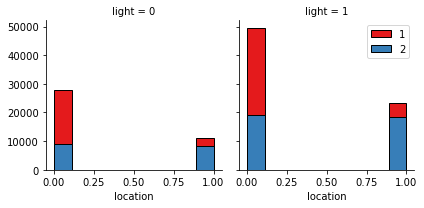

In [42]:
import seaborn as sns
bins = np.linspace(df.road.min(), df.road.max(), 10)
g = sns.FacetGrid(df, col="light", hue="severity", palette="Set1", col_wrap=2)
g.map(plt.hist, 'location', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [16]:
light_condition_distribution = %sql SELECT light as "Light Condition", count(*) as "Frequency" from COLLISIONS GROUP BY light;
light_condition_distribution

 * ibm_db_sa://hfc14579:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


Light Condition,Frequency
Dark,48133
Dawn,2347
Daylight,110520
Dusk,5545
Other,160


In [13]:
intoxicated_distribution = %sql SELECT intoxicated as "Intoxicated", count(*) as "Frequency" from COLLISIONS GROUP BY intoxicated;
intoxicated_distribution

 * ibm_db_sa://hfc14579:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


Intoxicated,Frequency
0,157945
1,8760


In [9]:
df['road'].replace(to_replace=['Dry','Wet','Ice','Oil','Other','Sand/Mud/Dirt','Snow/Slush','Standing Water'], value=[1,0,0,0,0,0,0,0],inplace=True)

In [10]:
df['light'].replace(to_replace=['Daylight','Dark','Dawn','Dusk','Other'], value=[1,0,0,0,0],inplace=True)

In [11]:
df['weather'].replace(to_replace=['Clear','Raining','Blowing Sand/Dirt','Fog/Smog/Smoke','Other','Overcast','Partly Cloudy','Snowing','Severe Crosswind','Sleet/Hail/Freezing Rain'], value=[1,0,0,0,0,0,0,0,0,0],inplace=True)

In [12]:
df['location'].replace(to_replace=['Intersection','Block'], value=[1,0],inplace=True)

In [27]:
df.head(15)

,severity,x,y,location,intoxicated,weather,road,light
0,2,-122.3231484,47.70314032,1,0,0,0,1
1,1,-122.3472943,47.64717249,0,0,0,0,0
2,1,-122.3345400,47.60787143,0,0,0,1,1
3,1,-122.3348033,47.60480289,0,0,1,1,1
4,2,-122.3064263,47.54573946,1,0,0,0,1
5,1,-122.3875981,47.69057545,1,0,1,1,1
6,1,-122.3384846,47.61853427,1,0,0,0,1
7,2,-122.3207804,47.61407567,1,0,1,1,1
8,1,-122.3359303,47.61190352,0,0,1,1,1
9,2,-122.3847002,47.52847544,1,0,1,1,1


In [13]:
X = df[['weather','road','light','location','intoxicated']]
X[0:5] 

,weather,road,light,location,intoxicated
0,0,0,1,1,0
1,0,0,0,0,0
2,0,1,1,0,0
3,1,1,1,0,0
4,0,0,1,1,0


In [14]:
Y = df['severity'].values
Y[0:5] 

array([2, 1, 1, 1, 2])

In [15]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[-1.33652954, -1.58886536,  0.71300037,  1.31459987, -0.23550445],
       [-1.33652954, -1.58886536, -1.40252382, -0.76068774, -0.23550445],
       [-1.33652954,  0.62937995,  0.71300037, -0.76068774, -0.23550445],
       [ 0.74820643,  0.62937995,  0.71300037, -0.76068774, -0.23550445],
       [-1.33652954, -1.58886536,  0.71300037,  1.31459987, -0.23550445]])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (133364, 5) (133364,)
Test set: (33341, 5) (33341,)


In [1]:
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
DTmodel = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [50]:
DTmodel.fit(X_train,Y_train)
DTmodel

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
yhat = DTmodel.predict(X_test)

In [53]:
print (yhat [0:5])
print (Y_test [0:5])

[1 1 1 1 1]
[2 2 1 2 1]


In [54]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, yhat))

DecisionTrees's Accuracy:  0.6717255031342791


In [55]:
#Decision Tree model evaluation:
print("DT Jaccard index: %.2f" % jaccard_similarity_score(Y_test, yhat))
print("DT F1-score: %.2f" % f1_score(Y_test, yhat, average='weighted'))

DT Jaccard index: 0.67
DT F1-score: 0.54


In [2]:
import pylab as pl
import scipy.optimize as opt
from sklearn import svm

In [ ]:
SVMmodel = svm.SVC(kernel='rbf')
SVMmodel.fit(X_train, Y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
yhat = SVMmodel.predict(X_test)
print (yhat [0:5])
print (Y_test [0:5])

In [ ]:
#Support Vector Machine (SVM) model evaluation:
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(Y_test, yhat))
print("SVM F1-score: %.2f" % f1_score(Y_test, yhat, average='weighted'))